In [51]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [52]:
#import data set and clean up
charity = pd.read_csv('Charity.csv')
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.drop(['Renewals'], inplace=True, axis=1)
charity.drop(['dob'], inplace=True, axis=1)
charity.drop(['RenewalsOrAcq'], inplace=True, axis=1)
charity.drop(['suburb'], inplace=True, axis=1)
charity.drop(['state'], inplace=True, axis=1)
charity = charity.dropna(subset=['age'])
charity['age'] = charity['age'].convert_objects(convert_numeric=True)
charity = charity.dropna(subset=['age'])
charity['postcode'] = charity['postcode'].astype(str)
charity.postcode.dtype
tax = pd.read_csv('2014tax2.csv')
tax['postcode'] = tax['postcode'].astype(str)
charity_new = pd.merge(charity, tax, on='postcode')
charity_new.head()
burs = pd.read_csv('abs2011combo.csv')
burs['postcode'] = burs['postcode'].astype(str)
charity_plus = pd.merge(charity_new, burs, on='postcode')
charity_plus.drop(['postcode'], inplace=True, axis=1)
charity_plus.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,num_streets,collection_amount,donation_amount,total_received,age,gender,weekends,profitable,Acq,tax individuals,...,ID_NS_OcMngr,ID_NS_OcProf,ID_NS_OcTechTrdW,ID_NS_OcComPerS,ID_NS_OcClericAdm,ID_NS_OcSalesWk,ID_NS_OcMacOp_Driv,ID_NS_OcLab,ID_NS_OcID_NS,ID_NS_Tot
0,2,521.5,0,521.5,67,1,4,1,1,16956,...,8,20,27,15,15,10,19,29,99,242
1,2,250.0,0,250.0,57,1,4,1,1,16956,...,8,20,27,15,15,10,19,29,99,242
2,4,200.0,0,200.0,53,1,4,1,0,16956,...,8,20,27,15,15,10,19,29,99,242
3,2,140.0,0,140.0,59,0,4,1,1,16956,...,8,20,27,15,15,10,19,29,99,242
4,2,140.0,0,140.0,74,0,4,1,0,16956,...,8,20,27,15,15,10,19,29,99,242


In [53]:
#have a look at the data
#charity_plus.describe(include='all')

In [54]:
#K means clustering
from sklearn.cluster import KMeans

np.random.seed(2)

est = KMeans(n_clusters=5, init='random')
est.fit(charity_plus)
y_kmeans = est.predict(charity_plus)



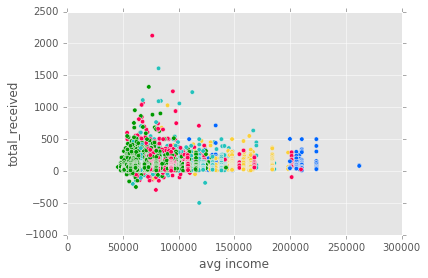

In [55]:
#plot the clusters
colors = np.array(['#FF0054','#FBD039','#23C2BC','#0066ff', '#009900'])
plt.figure()
charity_plus.plot(kind='scatter', x='avg income', y='total_received',c=colors[y_kmeans])

In [56]:
#add clusters back to data
charity_plus['cluster'] = est.predict(charity_plus)


In [57]:
charity_plus['postcode'] = charity['postcode']

In [58]:
#create smaller df for export for visualisation
col_list = ['num_streets','age','Acq', 'avg donation value','profitable','cluster','avg income','collection_amount','donation_amount','total_received','postcode']
#col_l2 = X[250,938,937,37,40]
exportcluster = charity_plus[col_list]
exportcluster.describe()

,num_streets,age,Acq,avg donation value,profitable,cluster,avg income,collection_amount,donation_amount,total_received
count,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000,26523.000000
mean,2.883610,62.458621,0.614372,520.477313,0.413377,2.200694,74126.849441,77.820176,3.724618,81.544794
std,2.548894,14.072699,0.486752,684.123478,0.492449,1.791111,19321.577981,70.843846,18.707591,70.658179
min,0.000000,0.000000,0.000000,109.177419,0.000000,0.000000,45580.474070,-414.950000,-150.000000,-500.000000
25%,1.000000,54.000000,0.000000,296.293056,0.000000,0.000000,62471.509520,37.000000,0.000000,40.000000
50%,2.000000,65.000000,1.000000,365.370730,0.000000,2.000000,68325.239040,61.000000,0.000000,64.000000
75%,3.000000,72.000000,1.000000,514.300380,1.000000,4.000000,79465.611680,100.000000,0.000000,101.000000
max,40.000000,103.000000,1.000000,21706.094200,1.000000,4.000000,261782.319000,2123.000000,1000.000000,2123.000000


In [59]:
exportcluster.to_csv('exportcluster2.csv')

In [40]:
est.cluster_centers_

array([[   2.67746931,   78.37008406,    3.42237584, ...,   34.44486229,
          84.96073443,  295.28647274],
       [   2.49512843,   90.54464128,    5.42590788, ...,   45.87953942,
         118.0469442 ,  427.99734278],
       [   2.2011552 ,   85.43283777,    4.66083375, ...,   44.93897539,
         113.01205424,  412.76343546],
       [   1.94230769,  114.996875  ,   12.58605769, ...,    6.14903846,
          53.50480769,  222.55288462],
       [   3.31242292,   73.10226096,    3.33331826, ...,   16.41067171,
          36.92246979,  120.13080654]])

In [41]:
est.labels_

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [42]:
est.inertia_

20025606744861164.0

In [43]:
centroids = est.cluster_centers_

In [44]:
centroids

array([[   2.67746931,   78.37008406,    3.42237584, ...,   34.44486229,
          84.96073443,  295.28647274],
       [   2.49512843,   90.54464128,    5.42590788, ...,   45.87953942,
         118.0469442 ,  427.99734278],
       [   2.2011552 ,   85.43283777,    4.66083375, ...,   44.93897539,
         113.01205424,  412.76343546],
       [   1.94230769,  114.996875  ,   12.58605769, ...,    6.14903846,
          53.50480769,  222.55288462],
       [   3.31242292,   73.10226096,    3.33331826, ...,   16.41067171,
          36.92246979,  120.13080654]])

In [45]:
headers = charity_plus.drop(['cluster'], inplace=True, axis=1)

In [46]:
#centroids2 = pd.DataFrame(centroids, charity_plus.columns.values)
centroids2 = pd.DataFrame(centroids, columns=charity_plus.columns)
centroids2

,num_streets,collection_amount,donation_amount,total_received,age,gender,weekends,profitable,Acq,tax individuals,...,ID_NS_OcMngr,ID_NS_OcProf,ID_NS_OcTechTrdW,ID_NS_OcComPerS,ID_NS_OcClericAdm,ID_NS_OcSalesWk,ID_NS_OcMacOp_Driv,ID_NS_OcLab,ID_NS_OcID_NS,ID_NS_Tot
0,2.677469,78.370084,3.422376,81.792460,61.853114,0.652140,3.252627,0.419644,0.622387,12841.285698,...,23.506692,26.643402,38.586771,15.554916,36.945360,15.743834,18.899900,34.444862,84.960734,295.286473
1,2.495128,90.544641,5.425908,95.970549,62.958370,0.646590,3.232950,0.492471,0.603189,20243.121346,...,41.079717,54.065545,41.130204,26.900797,56.408326,20.976971,23.509300,45.879539,118.046944,427.997343
2,2.201155,85.432838,4.660834,90.093672,61.903566,0.654696,3.388749,0.467102,0.607735,18942.715721,...,35.058262,42.316675,54.045455,21.269211,54.072577,21.402813,26.647413,44.938975,113.012054,412.763435
3,1.942308,114.996875,12.586058,127.582933,66.028846,0.682692,3.913462,0.610577,0.735577,10833.485577,...,37.442308,49.879808,12.533654,12.822115,32.932692,13.985577,3.302885,6.149038,53.504808,222.552885
4,3.312423,73.102261,3.333318,76.435579,62.982981,0.655348,3.415934,0.380416,0.609554,5000.814273,...,8.432624,8.467977,16.277481,6.207186,13.138699,5.430650,8.843049,16.410672,36.922470,120.130807


In [47]:
centroids2['avg income']

0     75122.891990
1    105306.699937
2     83095.485339
3    156702.097624
4     66143.947881
Name: avg income, dtype: float64

In [ ]:
#Labels:
    #0 = blue collar collectors - average volunteers, average returns
    #1 = underperformers - well populated, high incomes, modest returns
    #2 = middle of the road - above average incomes, okay returns 
    #3 = old money - high avg incomes, avg charity donations $5.5k each year, older & newer collecters, fewer streets
    #4 = scraping by - collectors in low affluence neighbourhoods often having to chip in themselves to be profitable

In [26]:
centroids2['avg donation value']

0     471.757386
1    1392.673060
2     656.201786
3    5498.532469
4     346.168140
Name: avg donation value, dtype: float64